In [37]:
import os.path
import h5py
import numpy as np
import csiroct_imbl_asci as cia
import matplotlib.pyplot as plt

file_test_epics = 'test_epics.h5'
file_test_xtract = 'test_x-tract_convert.h5'

arrEpics shape:  (100, 10, 10)


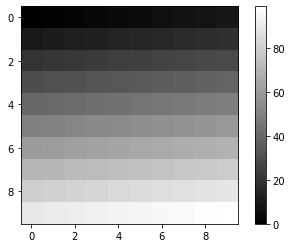

In [40]:
with h5py.File(file_test_epics, 'r') as f_test_epics:
    # Extract the dataset
    arrEpics = np.array(f_test_epics['entry/data/data'])
    
    print('arrEpics shape: ',arrEpics.shape)

    # Display the first 2D projection/image
    fig, ax = plt.subplots()
    fig.colorbar( ax.imshow(arrEpics[0] , cmap='gray'), ax=ax)  
    plt.show()

In [39]:
# Convert to X-TRACT compatible HDF5 using the same EPICS
# test file for flats, darks and samples
num_proj = cia.convert_epics_to_xtract_hdf5(
        file_test_epics,
        file_test_epics,
        file_test_epics,
        file_test_xtract)

print( 'Number of copied projections =', num_proj )

Number of copied projections = 100


exchange
exchange/data
exchange/data_dark
exchange/data_flat
arrXTRACT shape:  (100, 10, 10)


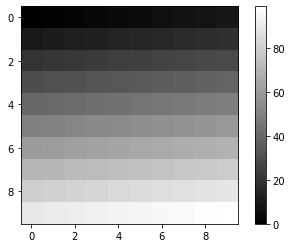

In [41]:
with h5py.File(file_test_xtract, 'r') as f_test_xtract:
    # Output names of items in the X-TRACT HDF5 file
    f_test_xtract['/'].visit( lambda name: print(name) )
    
    arrXTRACT = np.array(f_test_xtract['exchange/data'])
    
    print('arrXTRACT shape: ',arrXTRACT.shape)
    
    # Display the first 2D projection/image
    fig, ax = plt.subplots()
    fig.colorbar( ax.imshow(arrEpics[0] , cmap='gray'), ax=ax)  
    plt.show()

In [35]:
# Convert to X-TRACT compatible HDF5 using the same EPICS
# test file for flats, darks and samples
# This time use striding to extract a subset
# Get every 10th projection starting at index 10
num_proj = cia.convert_epics_to_xtract_hdf5(
        file_test_epics,
        file_test_epics,
        file_test_epics,
        file_test_xtract,
        sample_start=10,
        sample_stride=10 )

print( 'Number of copied projections =', num_proj )

Number of copied projections = 9


exchange
exchange/data
exchange/data_dark
exchange/data_flat
arrXTRACT shape:  (100, 10, 10)


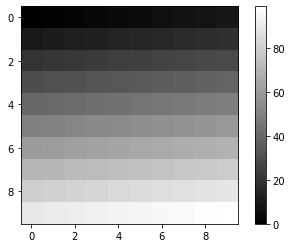

In [42]:
with h5py.File(file_test_xtract, 'r') as f_test_xtract:
    # Output names of items in the X-TRACT HDF5 file
    f_test_xtract['/'].visit( lambda name: print(name) )
    
    arrXTRACT = np.array(f_test_xtract['exchange/data'])
    
    print('arrXTRACT shape: ',arrXTRACT.shape)
    
    # Display the first 2D projection/image
    fig, ax = plt.subplots()
    fig.colorbar( ax.imshow(arrEpics[0] , cmap='gray'), ax=ax)  
    plt.show()